# Logistic Regression

In [1]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
data = iris.data[:100]
y = iris.target[:100]
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

[]

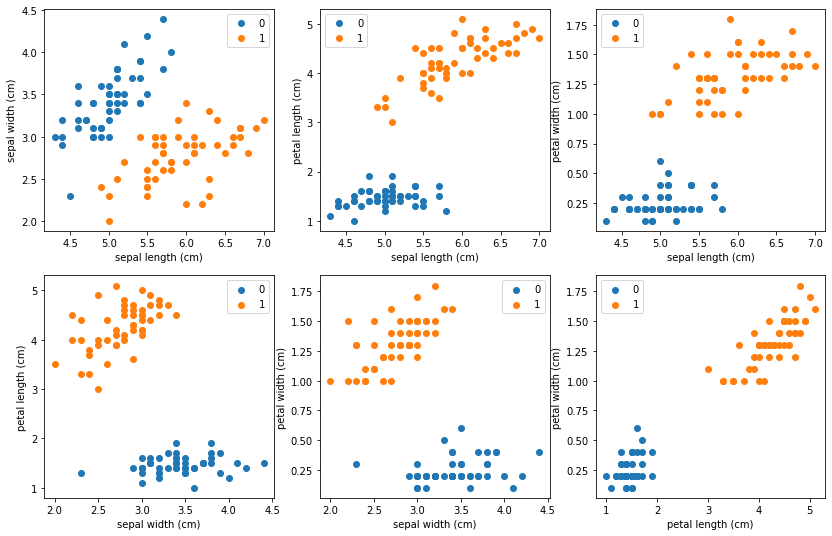

In [15]:
fig, axs = plt.subplots(2,3, figsize=(14,9))
color = ['tab:blue', 'tab:orange']
for i in np.unique(y):
    idx = y == i
    axs[0][0].scatter(data[:,0][idx], data[:,1][idx], c=color[int(i)], label=i)
    axs[0][1].scatter(data[:,0][idx], data[:,2][idx], c=color[int(i)], label=i)
    axs[0][2].scatter(data[:,0][idx], data[:,3][idx], c=color[int(i)], label=i)
    axs[1][0].scatter(data[:,1][idx], data[:,2][idx], c=color[int(i)], label=i)
    axs[1][1].scatter(data[:,1][idx], data[:,3][idx], c=color[int(i)], label=i)
    axs[1][2].scatter(data[:,2][idx], data[:,3][idx], c=color[int(i)], label=i)
# label
for i in range(3):
    axs[0][i].set_xlabel('sepal length (cm)')
for i in range(2):
    axs[1][i].set_xlabel('sepal width (cm)')
axs[1][2].set_xlabel('petal length (cm)')
axs[0][0].set_ylabel('sepal width (cm)')
axs[0][1].set_ylabel('petal length (cm)')
axs[0][2].set_ylabel('petal width (cm)')
axs[1][0].set_ylabel('petal length (cm)')
axs[1][1].set_ylabel('petal width (cm)')
axs[1][2].set_ylabel('petal width (cm)')
for i in range(3):
    for j in range(2):
        axs[j][i].legend()
plt.plot()

[]

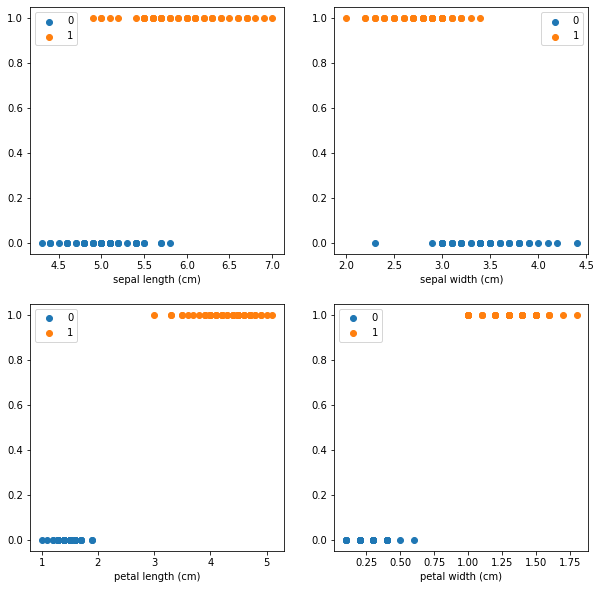

In [27]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
color = ['tab:blue', 'tab:orange']
for i in np.unique(y):
    idx = y == i
    axs[0][0].scatter(data[:,0][idx], y[idx], c=color[int(i)], label=i)
    axs[0][1].scatter(data[:,1][idx], y[idx], c=color[int(i)], label=i)
    axs[1][0].scatter(data[:,2][idx], y[idx], c=color[int(i)], label=i)
    axs[1][1].scatter(data[:,3][idx], y[idx], c=color[int(i)], label=i)

axs[0][0].set_xlabel('sepal length (cm)')
axs[0][1].set_xlabel('sepal width (cm)')
axs[1][0].set_xlabel('petal length (cm)')
axs[1][1].set_xlabel('petal width (cm)')
for i in range(2):
    for j in range(2):
        axs[j][i].legend()
plt.plot()

In [39]:
X0 = data[:,0].reshape(-1,1)
X1 = data[:,1].reshape(-1,1)
X2 = data[:,2].reshape(-1,1)
X3 = data[:,3].reshape(-1,1)
X01= data[:,:2]
X23 = data[:,2:]

In [40]:
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression().fit(X0,y)
clf1 = LogisticRegression().fit(X1,y)
clf2 = LogisticRegression().fit(X2,y)
clf3 = LogisticRegression().fit(X3,y)
clf01 = LogisticRegression().fit(X01,y)
clf23 = LogisticRegression().fit(X23,y)

[]

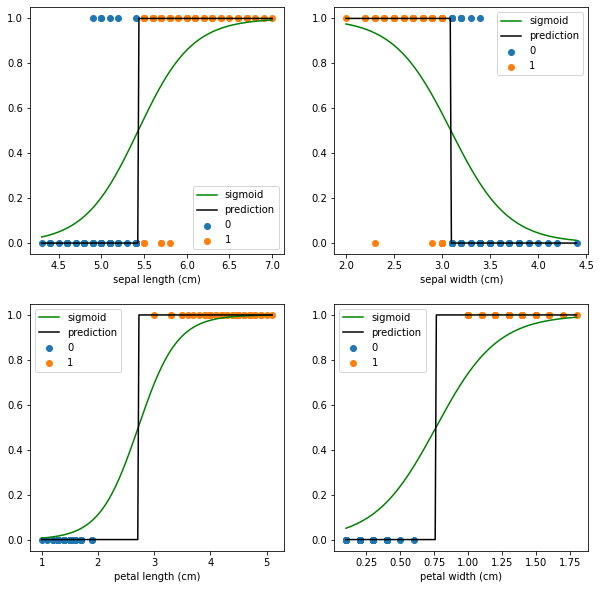

In [109]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
clfs = [clf0, clf1, clf2, clf3]
predict = [clf0.predict(X0), clf1.predict(X1), clf2.predict(X2), clf3.predict(X3)]
fig, axs = plt.subplots(2,2, figsize=(10,10))
pxs = [np.linspace(data[:,i].min() ,data[:,i].max(), 200).reshape(-1,1) for i in range(len(clfs))]
pys = [clfs[i].predict_proba(pxs[i])[:,1] for i in range(len(clfs))]
pys2 = [clfs[i].predict(pxs[i]) for i in range(len(clfs))]
color = ['tab:blue', 'tab:orange']
for i in np.unique(y):
    for j in range(len(predict)):
        idx = predict[j] == i
        axs[j//2][j%2].scatter(data[:,j][idx], y[idx], c=color[int(i)], label=i)
for i in range(len(clfs)):
    axs[i//2][i%2].plot(pxs[i], pys[i], c='green', label='sigmoid')
    axs[i//2][i%2].plot(pxs[i], pys2[i], c='black', label='prediction')
axs[0][0].set_xlabel('sepal length (cm)')
axs[0][1].set_xlabel('sepal width (cm)')
axs[1][0].set_xlabel('petal length (cm)')
axs[1][1].set_xlabel('petal width (cm)')
for i in range(2):
    for j in range(2):
        axs[j][i].legend()
plt.plot()

[]

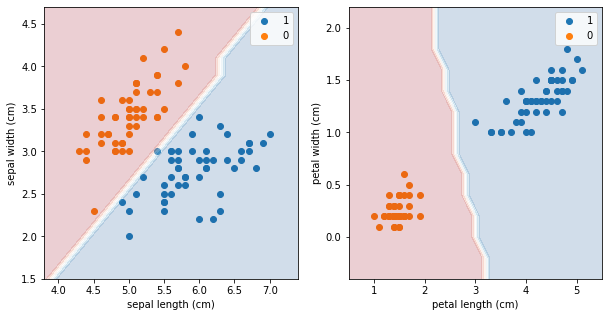

In [121]:
clfs = [clf01, clf23]
predict = [clf01.predict(X01), clf23.predict(X23)]
fig, axs = plt.subplots(1,2, figsize=(10,5))
cmap=plt.cm.RdBu
for i in np.unique(y)[::-1]:
    for j in range(len(predict)):
        idx = predict[j] == i
        axs[j].scatter(data[:,j*2][idx], data[:, j*2+1][idx], cmap=cmap, label=i)
axs[0].set_xlabel('sepal length (cm)')
axs[0].set_ylabel('sepal width (cm)')
axs[1].set_xlabel('petal length (cm)')
axs[1].set_ylabel('petal width (cm)')
for i in range(2):
    axs[i].legend()
for i in range(len(clfs)):
    x_min, x_max = data[:, i*2].min() - .5, data[:, i*2].max() + .5
    y_min, y_max = data[:, i*2+1].min() - .5, data[:, i*2+1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
    Z = clfs[i].predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    axs[i].set_xlim(xx.min(), xx.max())
    axs[i].set_ylim(yy.min(), yy.max())
    axs[i].contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
plt.plot()